# Machine Learning Analysis
This section applies unsupervised machine learning (KMeans clustering and PCA) to identify patterns in national team performance in the FIFA World Cup.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

# Setup
sns.set(style='whitegrid')


In [3]:
# Load processed team data
df = pd.read_csv('team_stats.csv')
df.head()


,team,confed,sum_stage_score_full,sum_stage_score_post94,win_rate,gd_per_game,gf_per_game,avg_rank
0,Algeria,CAF,6,3.0,0.229167,0.000000,0.937500,53.779817
1,Angola,CAF,1,1.0,0.000000,NaN,0.333333,87.360856
2,Argentina,CONMEBOL,61,25.0,0.502513,0.859341,1.696825,5.532110
3,Australia,AFC,9,7.0,0.180556,-0.500000,0.819444,46.574924
4,Austria,UEFA,18,1.0,0.361905,0.400000,1.378571,47.749235


In [4]:
# Drop rows with missing values in selected columns and make a copy
features = ['avg_rank', 'win_rate', 'gd_per_game']
df_ml = df.dropna(subset=features).copy()

# Store team names for reference
teams = df_ml['team']
X = df_ml[features]


In [5]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results to DataFrame
df_ml['PC1'] = X_pca[:, 0]
df_ml['PC2'] = X_pca[:, 1]

# Explained variance
pca.explained_variance_ratio_


array([0.81042516, 0.12071595])

In [7]:
# Fit KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add cluster info
df_ml['Cluster'] = clusters


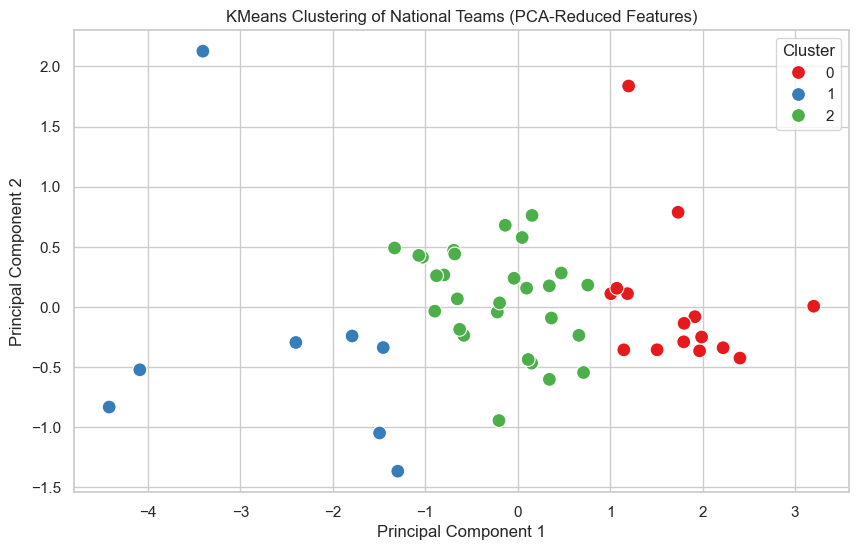

In [8]:
# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_ml, palette='Set1', s=100)
plt.title('KMeans Clustering of National Teams (PCA-Reduced Features)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [10]:
# Display sample teams from each cluster
df_ml[['team', 'avg_rank', 'win_rate', 'gd_per_game', 'Cluster']].groupby('Cluster').head(5)


,team,avg_rank,win_rate,gd_per_game,Cluster
0,Algeria,53.779817,0.229167,0.000000,2
2,Argentina,5.532110,0.502513,0.859341,0
3,Australia,46.574924,0.180556,-0.500000,1
4,Austria,47.749235,0.361905,0.400000,2
5,Belgium,26.440367,0.304252,0.365873,2
7,Bosnia and Herzegovina,57.917763,0.333333,0.000000,2
8,Brazil,3.125382,0.625649,1.314035,0
10,Cameroon,37.966361,0.158333,0.000000,2
11,Canada,78.018349,0.000000,-1.666667,1
14,Colombia,19.532110,0.369444,0.783333,0
